**1. LOADING AND ANALYSING INITIAL DATA**



In [ ]:
import pandas as pd
file_path = 'Data_For Midterm and Final Project.xlsx'
df = pd.read_excel(file_path, sheet_name='saoke_td_ct')
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90344 entries, 0 to 90343
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MJACCTTYPCD          90344 non-null  object 
 1   PHUONG THUC CHO VAY  90344 non-null  object 
 2   LOAIKH               90344 non-null  int64  
 3   SEX                  86014 non-null  object 
 4   BASE_BAL             90344 non-null  float64
 5   CURR_BAL             90344 non-null  float64
 6   DUNO_QD              90344 non-null  float64
 7   CURRENCYCD           90344 non-null  object 
 8   OPEN_DATE            90344 non-null  object 
 9   NGAYDENHAN           90344 non-null  object 
 10  ID_TIME              90344 non-null  int64  
 11  DESC_TIME            90344 non-null  object 
 12  MJACCTTYPDESC        90344 non-null  object 
 13  ORGNBR               90344 non-null  int64  
 14  ORGNAME              90344 non-null  object 
 15  PARENTORGNBR         90344 non-null 

**2.CHECK WRONG DATA TYPE/FORMAT**

**2.1. STANDARDIZATION OF DATE FORMATS**

In [ ]:
import numpy as np

def excel_serial_to_datetime(val):
    if pd.isna(val):
        return np.nan
    try:
        val = float(val)
        # Excel serial date: 1/1/1900 is 1
        return pd.to_datetime('1899-12-30') + pd.to_timedelta(val, 'D')
    except:
        try:
            return pd.to_datetime(val, dayfirst=True, errors='coerce')
        except:
            return np.nan

df['OPEN_DATE'] = df['OPEN_DATE'].apply(excel_serial_to_datetime)
df['NGAYDENHAN'] = df['NGAYDENHAN'].apply(excel_serial_to_datetime)


In [ ]:
print(df[['OPEN_DATE', 'NGAYDENHAN']].head(10))


   OPEN_DATE NGAYDENHAN
0 2010-12-28 2020-03-12
1 2010-11-08 2030-07-28
2 2010-05-27 2030-05-26
3 2010-04-08 2013-04-08
4 2010-06-23 2030-06-23
5 2010-04-05 2040-05-04
6 2008-11-19 2018-12-11
7 2010-10-23 2011-10-23
8 2010-08-04 2030-08-04
9 2010-01-06 2030-01-06


**2.2. VERIFICATION OF DATA TYPES**



**Data types before any conversion**



In [ ]:
import pandas as pd

file_path = 'Data_For Midterm and Final Project.xlsx'
sheet_name = 'saoke_td_ct'

df = pd.read_excel(
    file_path,
    sheet_name=sheet_name,
    converters={'OPEN_DATE': str, 'NGAYDENHAN': str}
)
print(df.dtypes)


MJACCTTYPCD             object
PHUONG THUC CHO VAY     object
LOAIKH                   int64
SEX                     object
BASE_BAL               float64
CURR_BAL               float64
DUNO_QD                float64
CURRENCYCD              object
OPEN_DATE               object
NGAYDENHAN              object
ID_TIME                  int64
DESC_TIME               object
MJACCTTYPDESC           object
ORGNBR                   int64
ORGNAME                 object
PARENTORGNBR             int64
PARENTORGNAME           object
LAISUAT                float64
MUCDICHVAY              object
NHOMNO                   int64
NHOMNOMOI                int64
NHOMNO_TCBS             object
dtype: object


**Data types after date & numeric conversion**





**DATE**

In [ ]:
import numpy as np

def excel_serial_to_datetime(val):
    if pd.isna(val): return np.nan
    try:
        return pd.to_datetime('1899-12-30') + pd.to_timedelta(float(val), 'D')
    except:
        return pd.to_datetime(val, dayfirst=True, errors='coerce')

for col in ['OPEN_DATE', 'NGAYDENHAN']:
    df[col] = df[col].apply(excel_serial_to_datetime)

print(df[['OPEN_DATE', 'NGAYDENHAN']].dtypes)
print(df[['OPEN_DATE', 'NGAYDENHAN']].head(3))


OPEN_DATE     datetime64[ns]
NGAYDENHAN    datetime64[ns]
dtype: object
   OPEN_DATE NGAYDENHAN
0 2010-12-28 2020-03-12
1 2010-11-08 2030-07-28
2 2010-05-27 2030-05-26


**NUMERIC**

In [ ]:
num_cols = ['BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'LAISUAT']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


**Sample numerical data after conversion**


In [ ]:

print("Data types after all conversions:")
print(df.dtypes)


Data types after all conversions:
MJACCTTYPCD                    object
PHUONG THUC CHO VAY            object
LOAIKH                          int64
SEX                            object
BASE_BAL                      float64
CURR_BAL                      float64
DUNO_QD                       float64
CURRENCYCD                     object
OPEN_DATE              datetime64[ns]
NGAYDENHAN             datetime64[ns]
ID_TIME                         int64
DESC_TIME                      object
MJACCTTYPDESC                  object
ORGNBR                          int64
ORGNAME                        object
PARENTORGNBR                    int64
PARENTORGNAME                  object
LAISUAT                       float64
MUCDICHVAY                     object
NHOMNO                          int64
NHOMNOMOI                       int64
NHOMNO_TCBS                    object
dtype: object


In [ ]:
print(df[num_cols].head())

      BASE_BAL     CURR_BAL      DUNO_QD  LAISUAT
0  787127020.0  851714900.0  851714900.0     0.12
1  333388030.0  142450650.0  142450650.0     0.18
2  311014800.0  357000690.0  357000690.0     0.18
3   35600000.0   35600000.0   35600000.0     0.24
4  430174020.0   88246180.0   88246180.0     0.18


In [ ]:

print(df.dtypes)


MJACCTTYPCD                    object
PHUONG THUC CHO VAY            object
LOAIKH                          int64
SEX                            object
BASE_BAL                      float64
CURR_BAL                      float64
DUNO_QD                       float64
CURRENCYCD                     object
OPEN_DATE              datetime64[ns]
NGAYDENHAN             datetime64[ns]
ID_TIME                         int64
DESC_TIME                      object
MJACCTTYPDESC                  object
ORGNBR                          int64
ORGNAME                        object
PARENTORGNBR                    int64
PARENTORGNAME                  object
LAISUAT                       float64
MUCDICHVAY                     object
NHOMNO                          int64
NHOMNOMOI                       int64
NHOMNO_TCBS                    object
dtype: object


**3. CHECK MISSING DATA**

**Missing value assessment**

In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
MJACCTTYPCD               0
PHUONG THUC CHO VAY       0
LOAIKH                    0
SEX                    4330
BASE_BAL                  0
CURR_BAL                  0
DUNO_QD                   0
CURRENCYCD                0
OPEN_DATE                 0
NGAYDENHAN                0
ID_TIME                   0
DESC_TIME                 0
MJACCTTYPDESC             0
ORGNBR                    0
ORGNAME                   0
PARENTORGNBR              0
PARENTORGNAME             0
LAISUAT                   0
MUCDICHVAY                0
NHOMNO                    0
NHOMNOMOI                 0
NHOMNO_TCBS               0
dtype: int64


**Impute by Mode**

In [ ]:
mode_sex = df['SEX'].mode()[0]
df['SEX'] = df['SEX'].fillna(mode_sex)


**After impute by Mode**

In [ ]:

print("Number of missing values in SEX after imputation:", df['SEX'].isnull().sum())


Number of missing values in SEX after imputation: 0


**4. CHECK DUPLICATES**

In [ ]:
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 1080


In [ ]:
df = df.drop_duplicates()


In [ ]:
print("Number of duplicate rows after removal:", df.duplicated().sum())

Number of duplicate rows after removal: 0


**5.OUTLIER/EXTREME VALUE**


In [ ]:
num_cols = ['BASE_BAL', 'CURR_BAL', 'DUNO_QD']


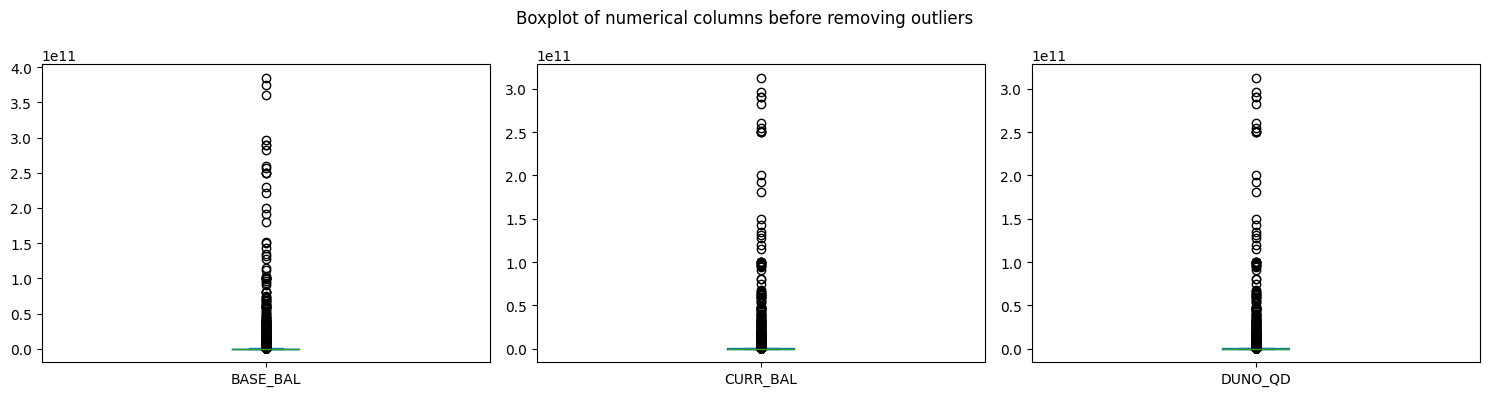

In [ ]:
import matplotlib.pyplot as plt
df[num_cols].plot(kind='box', subplots=True, layout=(1,len(num_cols)), figsize=(5*len(num_cols),4), sharex=False)
plt.suptitle('Boxplot of numerical columns before removing outliers')
plt.tight_layout()
plt.show()


**Use Z-score**

In [ ]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df[num_cols], nan_policy='omit'))
mask = (z_scores < 3).all(axis=1)

print(f"Số dòng ban đầu: {len(df)}")
print(f"Số dòng sau khi loại outlier: {mask.sum()}")
print(f"Số dòng bị loại (outlier): {len(df) - mask.sum()}")

df = df[mask].copy()


Số dòng ban đầu: 89264
Số dòng sau khi loại outlier: 89064
Số dòng bị loại (outlier): 200


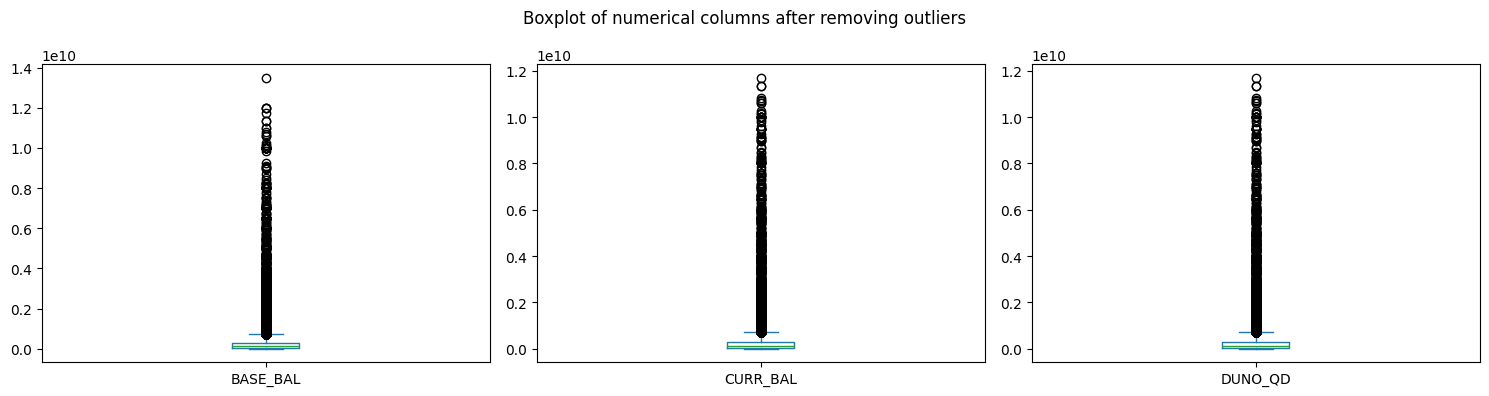

In [ ]:
df[num_cols].plot(kind='box', subplots=True, layout=(1,len(num_cols)), figsize=(5*len(num_cols),4), sharex=False)
plt.suptitle('Boxplot of numerical columns after removing outliers')
plt.tight_layout()
plt.show()

**6. UNBALANCED DATA**

In [ ]:
import pandas as pd
import numpy as np

df['target'] = df['NHOMNO']

print(df['target'].value_counts().sort_index())
print('Các lớp hiện có:', np.unique(df['target']))


target
1    79975
2     3181
3     1152
4     1161
5     3595
Name: count, dtype: int64
Các lớp hiện có: [1 2 3 4 5]


In [ ]:
import pandas as pd
import numpy as np

df['target'] = df['NHOMNO']

print(df['target'].value_counts().sort_index())
print('Các lớp hiện có:', np.unique(df['target']))



target
1    79975
2     3181
3     1152
4     1161
5     3595
Name: count, dtype: int64
Các lớp hiện có: [1 2 3 4 5]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Chọn X và y
X = df.drop(columns=['target', 'OPEN_DATE', 'NGAYDENHAN'], errors='ignore')
y = df['target']

# Encode các cột dạng object (chuỗi)
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))


**7. ENCODE THE DATA**

In [ ]:
from sklearn.preprocessing import LabelEncoder


X = X.drop(columns=['OPEN_DATE', 'NGAYDENHAN'], errors='ignore')

for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))


In [ ]:
print(X.dtypes)
print(X.head())


MJACCTTYPCD              int64
PHUONG THUC CHO VAY      int64
LOAIKH                   int64
SEX                      int64
BASE_BAL               float64
CURR_BAL               float64
DUNO_QD                float64
CURRENCYCD               int64
ID_TIME                  int64
DESC_TIME                int64
MJACCTTYPDESC            int64
ORGNBR                   int64
ORGNAME                  int64
PARENTORGNBR             int64
PARENTORGNAME            int64
LAISUAT                float64
MUCDICHVAY               int64
NHOMNO                   int64
NHOMNOMOI                int64
NHOMNO_TCBS              int64
dtype: object
   MJACCTTYPCD  PHUONG THUC CHO VAY  LOAIKH  SEX     BASE_BAL     CURR_BAL  \
0            1                    8       1    4  787127020.0  851714900.0   
1            1                    8       1    4  333388030.0  142450650.0   
2            1                    8       1    1  311014800.0  357000690.0   
3            1                   28       1    4   356

**8. CHECK CORRELATION**

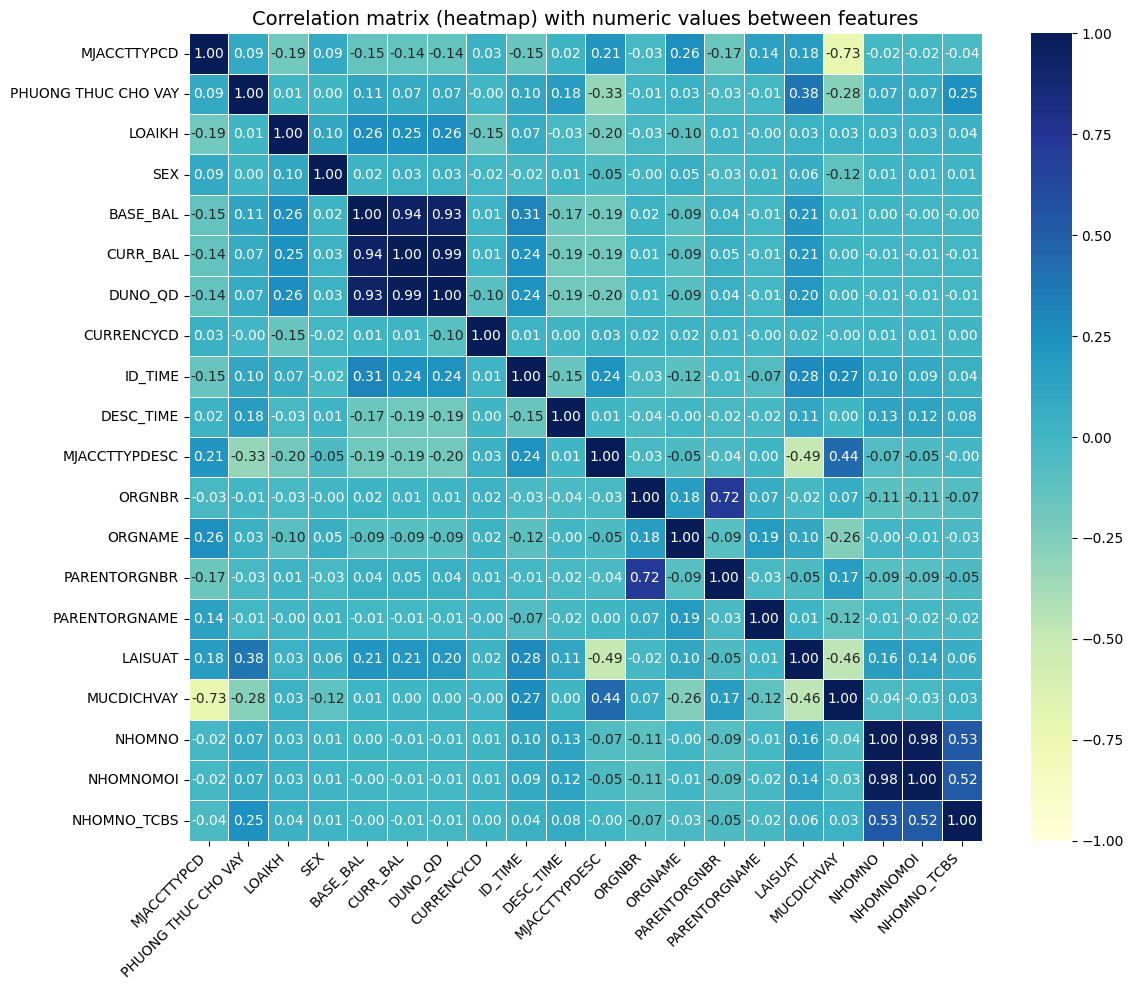

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nếu dùng pandas v2 trở lên: df.corr(numeric_only=True)
corr_matrix = X.corr()  # X là dataframe các biến đã encode số, KHÔNG chứa biến thời gian/datetime

plt.figure(figsize=(12, 10))  # Kích thước to cho dễ nhìn
sns.heatmap(
    corr_matrix,
    annot=True,           # Hiện số
    fmt=".2f",            # 2 số thập phân
    cmap="YlGnBu",        # Màu đẹp, phổ thông cho tương quan
    vmin=-1, vmax=1,      # Fix scale từ -1 đến 1 cho chuẩn
    linewidths=0.5        # Đường phân ô rõ nét
)
plt.title('Correlation matrix (heatmap) with numeric values between features', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Xoay tên cột cho dễ đọc
plt.tight_layout()
plt.show()


In [ ]:

threshold = 0.8


upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

print("Các biến sẽ bị loại do tương quan cao:", to_drop)


X_filtered = X.drop(columns=to_drop)



Các biến sẽ bị loại do tương quan cao: ['CURR_BAL', 'DUNO_QD', 'NHOMNOMOI']


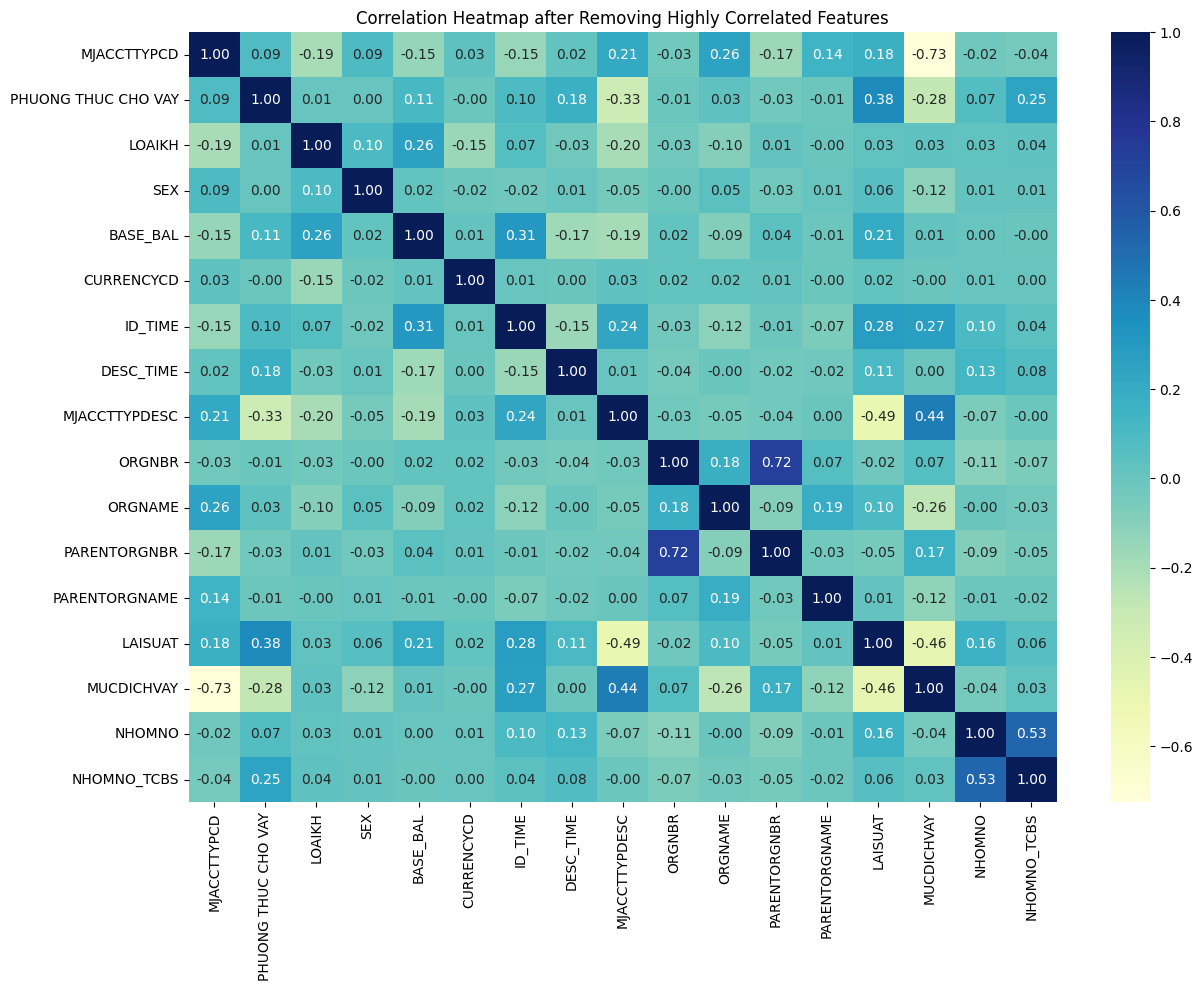

In [ ]:
corr_matrix_filtered = X_filtered.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix_filtered, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Heatmap after Removing Highly Correlated Features")
plt.show()



**9. FEATURE ENGINEERING**

In [ ]:
print(df.columns.tolist())


['MJACCTTYPCD', 'PHUONG THUC CHO VAY', 'LOAIKH', 'SEX', 'BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'CURRENCYCD', 'OPEN_DATE', 'NGAYDENHAN', 'ID_TIME', 'DESC_TIME', 'MJACCTTYPDESC', 'ORGNBR', 'ORGNAME', 'PARENTORGNBR', 'PARENTORGNAME', 'LAISUAT', 'MUCDICHVAY', 'NHOMNO', 'NHOMNOMOI', 'NHOMNO_TCBS', 'target']


In [ ]:
# Chia X, y đúng theo cột 'target'
X = df.drop(columns=['target'])
y = df['target']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [ ]:
print(X_train.columns.tolist())


['MJACCTTYPCD', 'PHUONG THUC CHO VAY', 'LOAIKH', 'SEX', 'BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'CURRENCYCD', 'OPEN_DATE', 'NGAYDENHAN', 'ID_TIME', 'DESC_TIME', 'MJACCTTYPDESC', 'ORGNBR', 'ORGNAME', 'PARENTORGNBR', 'PARENTORGNAME', 'LAISUAT', 'MUCDICHVAY', 'NHOMNO', 'NHOMNOMOI', 'NHOMNO_TCBS']


In [ ]:

categorical_features = ['SEX', 'MJACCTTYPEDESC']
continuous_features = ['LAISUAT', 'BASE_BAL', 'ID_TIME']


In [ ]:
categorical_features = ['SEX']
continuous_features = ['LAISUAT', 'BASE_BAL', 'ID_TIME']


In [ ]:
from sklearn.metrics import make_scorer, roc_auc_score

# Định nghĩa scorer cho multi-class
auc_scorer = make_scorer(
    roc_auc_score, needs_proba=True, multi_class='ovr'  # hoặc 'ovo'
)


In [ ]:
# 1. Loại bỏ các cột liên quan trực tiếp đến nhãn
X = df.drop(columns=['target', 'NHOMNOMOI', 'NHOMNO_TCBS', 'NHOMNO', 'OPEN_DATE', 'MUCDICHVAY', 'DESC_TIME', 'NGAYDENHAN'], errors='ignore')

# 2. Encode các biến dạng object trong X
from sklearn.preprocessing import LabelEncoder
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# 3. Gán nhãn là NHOMNO
y = df['NHOMNO'].astype(int)





In [ ]:
print(y.value_counts())


NHOMNO
1    79975
5     3595
2     3181
4     1161
3     1152
Name: count, dtype: int64


10.  Model Selection via Stratified K-Fold Cross-Validation with SMOTE

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE

# 1. Chuẩn bị dữ liệu
df = df.dropna(subset=["NHOMNO"])  # Bỏ dòng không có nhãn

y = df['NHOMNO'].astype(int)

# Loại bỏ các cột không dùng
drop_cols = ['target', 'NHOMNO', 'NHOMNO_TCBS', 'NHOMNOMOI', 'OPEN_DATE', 'MUCDICHVAY', 'DESC_TIME' , 'MGAYDENHAN']
X = df.drop(columns=drop_cols, errors='ignore')

# Loại datetime nếu còn sót
X = X.drop(columns=X.select_dtypes(include=['datetime64']).columns)

# Encode object columns
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Standardize numeric
numeric_cols = ['BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'LAISUAT', 'ID_TIME']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])



TRADITIONAL MODEL: Logistic Regression

In [ ]:
# Kiểm tra lại để loại bỏ toàn bộ cột datetime nếu còn sót
X = X.select_dtypes(include=['number'])  # Đảm bảo không còn datetime

# Standardize toàn bộ X
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Loại các cột không dùng
drop_cols = ['target', 'NHOMNO', 'NHOMNO_TCBS', 'NHOMNOMOI', 'OPEN_DATE', 'MUCDICHVAY', 'DESC_TIME' , 'MGAYDENHAN']
X = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

# 2. Encode object
from sklearn.preprocessing import LabelEncoder
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# 3. Drop hết các cột datetime còn lại nếu có
X = X.select_dtypes(include=['number'])

# 4. Standardize nếu muốn
from sklearn.preprocessing import StandardScaler
numeric_cols = ['BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'LAISUAT', 'ID_TIME']
scaler = StandardScaler()
for col in numeric_cols:
    if col in X.columns:
        X[col] = scaler.fit_transform(X[[col]])


y = df['NHOMNO'].astype(int)




# KFold + SMOTE
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=3000, solver='lbfgs', multi_class='multinomial')

accuracy_scores, f1_scores = [], []
cm_total = np.zeros((len(np.unique(y)), len(np.unique(y))), dtype=int)

for fold, (train_idx, val_idx) in enumerate(cv.split(X_scaled, y), 1):
    X_train, y_train = X_scaled.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X_scaled.iloc[val_idx], y.iloc[val_idx]

    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='macro')
    cm = confusion_matrix(y_val, y_pred, labels=np.unique(y))

    accuracy_scores.append(acc)
    f1_scores.append(f1)
    cm_total += cm

    print(f"Fold {fold} - Accuracy: {acc:.4f}, F1 Macro: {f1:.4f}")

# Tổng kết
print(" Logistic Regression - Mean Accuracy: {:.4f}, Mean F1 Macro: {:.4f}".format(
    np.mean(accuracy_scores), np.mean(f1_scores)
))






/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 1 - Accuracy: 0.4302, F1 Macro: 0.1927


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 2 - Accuracy: 0.4196, F1 Macro: 0.1903


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 3 - Accuracy: 0.4290, F1 Macro: 0.1923


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 4 - Accuracy: 0.4259, F1 Macro: 0.1914


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 5 - Accuracy: 0.4137, F1 Macro: 0.1830
 Logistic Regression - Mean Accuracy: 0.4237, Mean F1 Macro: 0.1900


NON TRADITIONAL MODEL

CatBoost Classifier

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# 1. Chuẩn hóa các biến numeric
numeric_cols = ['BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'LAISUAT', 'ID_TIME']
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# 2. Cài đặt mô hình
cat_model = CatBoostClassifier(verbose=0, random_state=42)
X_scaled = X_scaled.reset_index(drop=True)
y = y.reset_index(drop=True)

# 3. KFold setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores, f1_scores = [], []

# 4. Train qua các fold
for fold, (train_idx, val_idx) in enumerate(cv.split(X_scaled, y), 1):
    print(f"Fold {fold}")

    X_train, y_train = X_scaled.iloc[train_idx], y[train_idx]
    X_val, y_val = X_scaled.iloc[val_idx], y[val_idx]

    # SMOTE trên tập train
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # Huấn luyện và dự đoán
    cat_model.fit(X_train_res, y_train_res)
    y_pred = cat_model.predict(X_val)

    # Đánh giá
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='macro')
    accuracy_scores.append(acc)
    f1_scores.append(f1)

    print(f"Accuracy = {acc:.4f} | F1 Macro = {f1:.4f}")

# 5. Tổng kết kết quả
print("\nCatBoost (SMOTE + KFold):")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"F1 Macro: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")



Fold 1
Accuracy = 0.8434 | F1 Macro = 0.4247
Fold 2
Accuracy = 0.8474 | F1 Macro = 0.4226
Fold 3
Accuracy = 0.8387 | F1 Macro = 0.4048
Fold 4
Accuracy = 0.8354 | F1 Macro = 0.4067
Fold 5
Accuracy = 0.8366 | F1 Macro = 0.4202

CatBoost (SMOTE + KFold):
Accuracy: 0.8403 ± 0.0045
F1 Macro: 0.4158 ± 0.0083


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# 1. Chuẩn hóa các cột numeric
numeric_cols = ['BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'LAISUAT', 'ID_TIME']
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X_scaled[numeric_cols])

# 2. Cài đặt mô hình Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Tăng trọng số cho các lớp nhỏ
)
X_scaled = X_scaled.reset_index(drop=True)
y = y.reset_index(drop=True)

# 3. Setup StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
f1_scores = []

# 4. Train + đánh giá qua các fold
for fold, (train_idx, val_idx) in enumerate(cv.split(X_scaled, y), 1):
    print(f"Fold {fold}")

    X_train, y_train = X_scaled.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X_scaled.iloc[val_idx], y.iloc[val_idx]

    # SMOTE trên tập train
    sm = SMOTE(random_state=42)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

    # Huấn luyện
    rf_model.fit(X_train_sm, y_train_sm)

    # Dự đoán
    y_pred = rf_model.predict(X_val)

    # Đánh giá
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='macro')
    accuracy_scores.append(acc)
    f1_scores.append(f1)

    print(f"Accuracy = {acc:.4f} | F1 Macro = {f1:.4f}")

# 5. Tổng kết kết quả
print("\nRandom Forest (SMOTE + class_weight + KFold):")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"F1 Macro: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")



Fold 1
Accuracy = 0.8617 | F1 Macro = 0.4147
Fold 2
Accuracy = 0.8668 | F1 Macro = 0.4104
Fold 3
Accuracy = 0.8640 | F1 Macro = 0.4085
Fold 4
Accuracy = 0.8606 | F1 Macro = 0.4026
Fold 5
Accuracy = 0.8649 | F1 Macro = 0.4178

Random Forest (SMOTE + class_weight + KFold):
Accuracy: 0.8636 ± 0.0022
F1 Macro: 0.4108 ± 0.0052


## neutral network

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Chuẩn hóa dữ liệu
numeric_cols = ['BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'LAISUAT', 'ID_TIME']
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Neural Network model
nn_model = MLPClassifier(
    hidden_layer_sizes=(50,),  # bạn có thể tăng lên nếu muốn
    max_iter=100,
    early_stopping=True,
    n_iter_no_change=10,
    random_state=42
)

# Stratified KFold setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores, f1_scores = [], []
labels_order = sorted(y.unique())
cm_total = np.zeros((len(labels_order), len(labels_order)), dtype=int)

for fold, (train_idx, val_idx) in enumerate(cv.split(X_scaled, y), 1):
    print(f"\nFold {fold}")
    X_train, y_train = X_scaled.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X_scaled.iloc[val_idx], y.iloc[val_idx]

    # SMOTE
    sm = SMOTE(random_state=42)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

    # Train
    nn_model.fit(X_train_sm, y_train_sm)
    y_pred = nn_model.predict(X_val)

    # Evaluation
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='macro')
    cm = confusion_matrix(y_val, y_pred, labels=labels_order)

    accuracy_scores.append(acc)
    f1_scores.append(f1)
    cm_total += cm

    print(f"Accuracy = {acc:.4f} | F1 Macro = {f1:.4f}")

# Tổng kết kết quả
print("\nNeural Network + SMOTE + KFold:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Mean F1 Macro: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")






Fold 1
Accuracy = 0.5913 | F1 Macro = 0.3020

Fold 2
Accuracy = 0.5093 | F1 Macro = 0.2791

Fold 3
Accuracy = 0.5394 | F1 Macro = 0.2696

Fold 4
Accuracy = 0.5986 | F1 Macro = 0.2939

Fold 5
Accuracy = 0.4659 | F1 Macro = 0.2687

Neural Network + SMOTE + KFold:
Mean Accuracy: 0.5409 ± 0.0500
Mean F1 Macro: 0.2827 ± 0.0133


XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Bản đồ target: 1–5 <=> 0–4
label_mapping = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
label_reverse = {v: k for k, v in label_mapping.items()}

# 1. Encode target
y_encoded = y.map(label_mapping)

# 2. Chuẩn hóa numeric
numeric_cols = ['BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'LAISUAT', 'ID_TIME']
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# 3. XGBoost setup
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores, f1_scores = [], []
cm_total = np.zeros((5, 5), dtype=int)

# 4. KFold + SMOTE
for fold, (train_idx, val_idx) in enumerate(cv.split(X_scaled, y_encoded), 1):
    print(f"\nFold {fold}")
    X_train, y_train = X_scaled.iloc[train_idx], y_encoded.iloc[train_idx]
    X_val, y_val = X_scaled.iloc[val_idx], y_encoded.iloc[val_idx]

    # SMOTE
    sm = SMOTE(random_state=42)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

    # Train + predict
    xgb_model.fit(X_train_sm, y_train_sm)
    y_pred = xgb_model.predict(X_val)

    # Decode lại label
    y_val_decoded = y_val.map(label_reverse)
    y_pred_decoded = pd.Series(y_pred).map(label_reverse)

    # Evaluate
    acc = accuracy_score(y_val_decoded, y_pred_decoded)
    f1 = f1_score(y_val_decoded, y_pred_decoded, average='macro')
    cm = confusion_matrix(y_val_decoded, y_pred_decoded, labels=[1, 2, 3, 4, 5])

    accuracy_scores.append(acc)
    f1_scores.append(f1)
    cm_total += cm

    print(f"Accuracy = {acc:.4f} | F1 Macro = {f1:.4f}")

# 5. Tổng kết
print("\nXGBoost + SMOTE + KFold:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Mean F1 Macro: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")




Fold 1


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:44:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy = 0.8483 | F1 Macro = 0.4271

Fold 2


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy = 0.8505 | F1 Macro = 0.4244

Fold 3


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy = 0.8381 | F1 Macro = 0.4101

Fold 4


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy = 0.8410 | F1 Macro = 0.4130

Fold 5


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:46:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy = 0.8397 | F1 Macro = 0.4132

XGBoost + SMOTE + KFold:
Mean Accuracy: 0.8435 ± 0.0049
Mean F1 Macro: 0.4175 ± 0.0068


In [ ]:
results_updated = {
    "Logistic Regression": {
        "acc": [0.4302, 0.4196, 0.4290, 0.4259, 0.4137],
        "f1":  [0.1927, 0.1903, 0.1923, 0.1914, 0.1830]
    },
    "CatBoost": {
        "acc": [0.8434, 0.8474, 0.8387, 0.8354, 0.8366],
        "f1":  [0.4247, 0.4226, 0.4048, 0.4067, 0.4202]
    },
    "Random Forest": {
        "acc": [0.8617, 0.8668, 0.8640, 0.8606, 0.8649],
        "f1":  [0.4147, 0.4104, 0.4085, 0.4026, 0.4178]
    },
    "Neural Network": {
        "acc": [0.5913, 0.5093, 0.5394, 0.5986, 0.4659],
        "f1":  [0.3020, 0.2791, 0.2696, 0.2939, 0.2687]
    },
    "XGBoost": {
        "acc": [0.8483, 0.8505, 0.8381, 0.8410, 0.8397],
        "f1":  [0.4271, 0.4244, 0.4101, 0.4130, 0.4132]
    }
}

summary_rows = []
for model_name, metrics in results_updated.items():
    acc_list = metrics["acc"]
    f1_list = metrics["f1"]
    summary_rows.append({
        "Model": model_name,
        "Accuracy Mean": np.mean(acc_list),
        "Accuracy Std": np.std(acc_list),
        "F1 Macro Mean": np.mean(f1_list),
        "F1 Macro Std": np.std(f1_list),
    })

results_df = pd.DataFrame(summary_rows).sort_values(by="F1 Macro Mean", ascending=False)
print(results_df)


                 Model  Accuracy Mean  Accuracy Std  F1 Macro Mean  \
4              XGBoost        0.84352      0.004937        0.41756   
1             CatBoost        0.84030      0.004478        0.41580   
2        Random Forest        0.86360      0.002223        0.41080   
3       Neural Network        0.54090      0.049991        0.28266   
0  Logistic Regression        0.42368      0.006197        0.18994   

   F1 Macro Std  
4      0.006830  
1      0.008350  
2      0.005233  
3      0.013255  
0      0.003567  


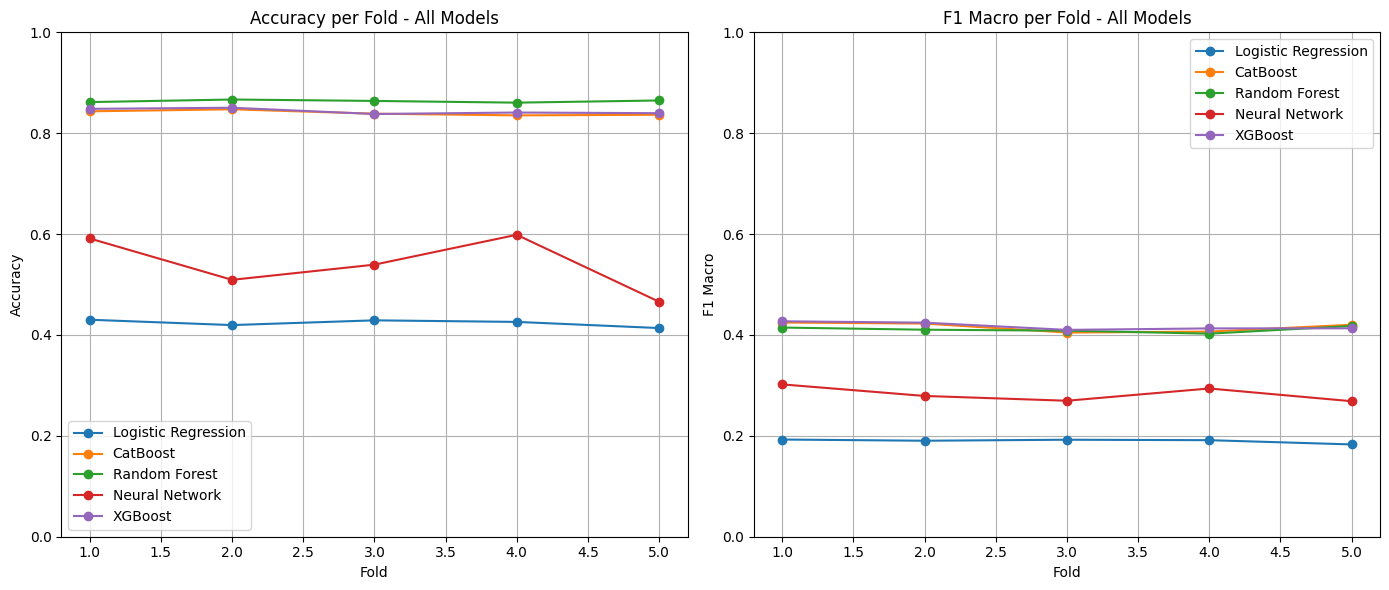

In [ ]:
import matplotlib.pyplot as plt

folds = range(1, 6)
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
for model, scores in results_updated.items():
    plt.plot(folds, scores["acc"], marker='o', label=model)
plt.title('Accuracy per Fold - All Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()

# F1 Macro plot
plt.subplot(1, 2, 2)
for model, scores in results_updated.items():
    plt.plot(folds, scores["f1"], marker='o', label=model)
plt.title('F1 Macro per Fold - All Models')
plt.xlabel('Fold')
plt.ylabel('F1 Macro')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

# Các mô hình
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

# Chuẩn hóa nếu cần
from sklearn.preprocessing import StandardScaler


In [ ]:
print("\nTop 3 best models by F1 Macro:")
print(results_df.sort_values(by="F1 Macro Mean", ascending=False).head(3))




Top 3 best models by F1 Macro:
           Model  Accuracy Mean  Accuracy Std  F1 Macro Mean  F1 Macro Std
4        XGBoost        0.84352      0.004937        0.41756      0.006830
1       CatBoost        0.84030      0.004478        0.41580      0.008350
2  Random Forest        0.86360      0.002223        0.41080      0.005233


CHỌN XGBOOST, CATBOOST, RANDOM FOREST ĐỂ TRAIN KỸ

 3. Final Evaluation on Train/Test Split

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Kiểm tra lại phân phối nhãn sau SMOTE
print(pd.Series(y_resampled).value_counts().sort_index())
print('Các lớp sau SMOTE:', np.unique(y_resampled))


NHOMNO
1    79975
2    79975
3    79975
4    79975
5    79975
Name: count, dtype: int64
Các lớp sau SMOTE: [1 2 3 4 5]


/tmp/ipython-input-51-1270848632.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, ax=axes[0], palette="Set2")
/tmp/ipython-input-51-1270848632.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, ax=axes[1], palette="Set1")


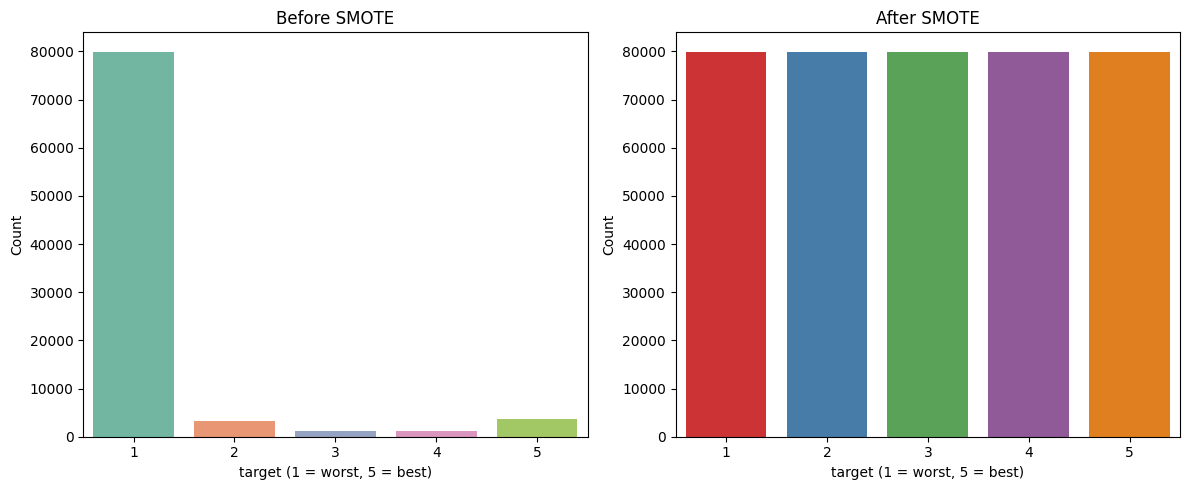

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=y, ax=axes[0], palette="Set2")
axes[0].set_title('Before SMOTE')
axes[0].set_xlabel('target (1 = worst, 5 = best)')
axes[0].set_ylabel('Count')

sns.countplot(x=y_resampled, ax=axes[1], palette="Set1")
axes[1].set_title('After SMOTE')
axes[1].set_xlabel('target (1 = worst, 5 = best)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

TOP 3 BEST MODEL FROM KFOLD + SMOTE

XGBOOST

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:55:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.89      0.92     15995
           2       0.10      0.18      0.13       636
           3       0.07      0.18      0.10       231
           4       0.12      0.23      0.16       232
           5       0.82      0.74      0.78       719

    accuracy                           0.84     17813
   macro avg       0.41      0.44      0.42     17813
weighted avg       0.90      0.84      0.87     17813

 Accuracy: 0.8430359849548082
 F1 Macro: 0.4156948319023865


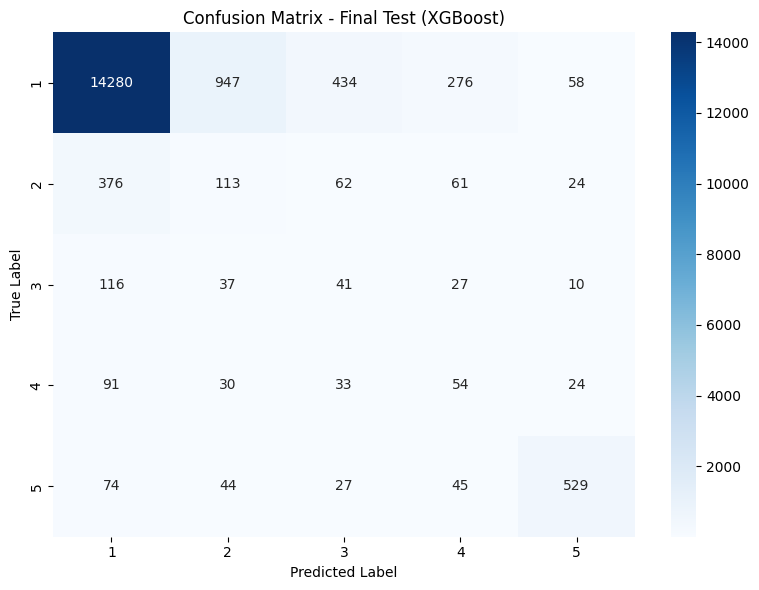

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# 1. Chuẩn bị dữ liệu
df = df.dropna(subset=["NHOMNO"])  # Bỏ dòng không có nhãn
y = df["NHOMNO"].astype(int)

# Loại bỏ các cột không dùng
drop_cols = ['target', 'NHOMNO', 'NHOMNO_TCBS', 'NHOMNOMOI', 'OPEN_DATE', 'MUCDICHVAY', 'DESC_TIME' , 'MGAYDENHAN']
X = df.drop(columns=drop_cols, errors='ignore')

# Loại datetime nếu còn sót
X = X.drop(columns=X.select_dtypes(include=['datetime64']).columns)

# Encode object columns
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Standardize numeric
numeric_cols = ['BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'LAISUAT', 'ID_TIME']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


# 5. Encode target 1–5 → 0–4
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 6. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42
)

# 7. SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# 8. Train XGBoost
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_sm, y_train_sm)

# 9. Predict
y_pred = model.predict(X_test)

# 10. Decode nhãn 0–4 → 1–5
y_test_decoded = le.inverse_transform(y_test)
y_pred_decoded = le.inverse_transform(y_pred)

# 11. Đánh giá mô hình
print(" Classification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))
print(" Accuracy:", accuracy_score(y_test_decoded, y_pred_decoded))
print(" F1 Macro:", f1_score(y_test_decoded, y_pred_decoded, average='macro'))

# 12. Confusion Matrix
cm = confusion_matrix(y_test_decoded, y_pred_decoded)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Final Test (XGBoost)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

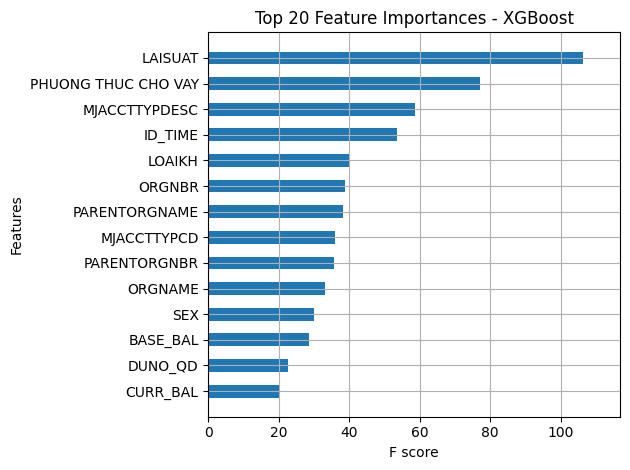

In [ ]:
from xgboost import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=20, height=0.5, importance_type='gain', show_values=False)
plt.title("Top 20 Feature Importances - XGBoost")
plt.tight_layout()
plt.show()


RANDOM FOREST

 Classification Report:

              precision    recall  f1-score   support

           1     0.9421    0.9619    0.9519     16241
           2     0.1375    0.1205    0.1284       639
           3     0.0786    0.0476    0.0593       231
           4     0.1667    0.1034    0.1277       232
           5     0.8037    0.7107    0.7544       726

    accuracy                         0.8994     18069
   macro avg     0.4257    0.3889    0.4043     18069
weighted avg     0.8871    0.8994    0.8929     18069


 Confusion Matrix:
       1    2   3   4    5
1  15623  413  82  65   58
2    501   77  25  15   21
3    153   29  11  23   15
4    142   23  11  24   32
5    164   18  11  17  516


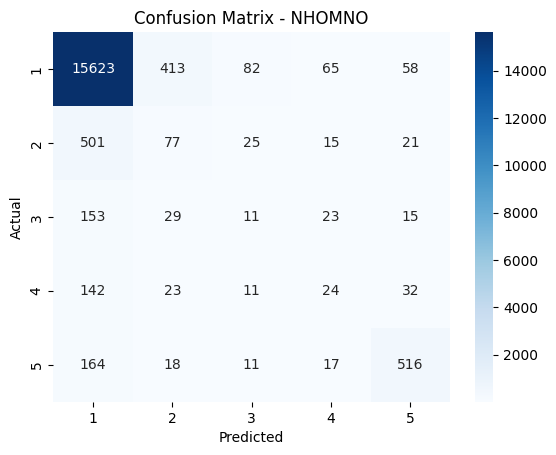

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 1. Load dataset
df = pd.read_excel("Data_For Midterm and Final Project.xlsx", sheet_name="saoke_td_ct")

# 2. Filter only NHOMNO ∈ [1,2,3,4,5]
df_clean = df.dropna(subset=['NHOMNO', 'NHOMNO_TCBS', 'NHOMNOMOI', 'OPEN_DATE', 'MUCDICHVAY', 'DESC_TIME' , 'NGAYDENHAN'])
df_clean = df_clean[df_clean['NHOMNO'].isin([1, 2, 3, 4, 5])]

# 3. Encode object columns
df_object = df_clean.select_dtypes(include=['object']).astype(str)
df_encoded = df_object.apply(LabelEncoder().fit_transform)
df_numeric = df_clean.select_dtypes(include=['number'])
df_model = pd.concat([df_numeric, df_encoded], axis=1)

# 4. Feature & Label
X = df_model.drop(columns=['NHOMNO', 'NHOMNO_TCBS', 'NHOMNOMOI', 'OPEN_DATE', 'MUCDICHVAY', 'DESC_TIME' , 'NGAYDENHAN'])
y = df_model['NHOMNO']

# 5. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6. Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 7. Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# 8. Predict
y_pred = rf.predict(X_test)

# 9. Evaluation
print(" Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

print("\n Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=[1,2,3,4,5], columns=[1,2,3,4,5])
print(cm_df)

# Optional: Vẽ heatmap confusion matrix
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - NHOMNO")
plt.show()


 Top 20 Important Features:
                Feature  Importance
7               LAISUAT    0.150938
1              BASE_BAL    0.114402
2              CURR_BAL    0.111151
3               DUNO_QD    0.110911
9   PHUONG THUC CHO VAY    0.093819
13              ORGNAME    0.088746
5                ORGNBR    0.085720
6          PARENTORGNBR    0.081062
14        PARENTORGNAME    0.068799
10                  SEX    0.039665
12        MJACCTTYPDESC    0.022820
8           MJACCTTYPCD    0.017783
4               ID_TIME    0.013426
0                LOAIKH    0.000751
11           CURRENCYCD    0.000008


/tmp/ipython-input-55-2795425492.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(20), x='Importance', y='Feature', palette='viridis')


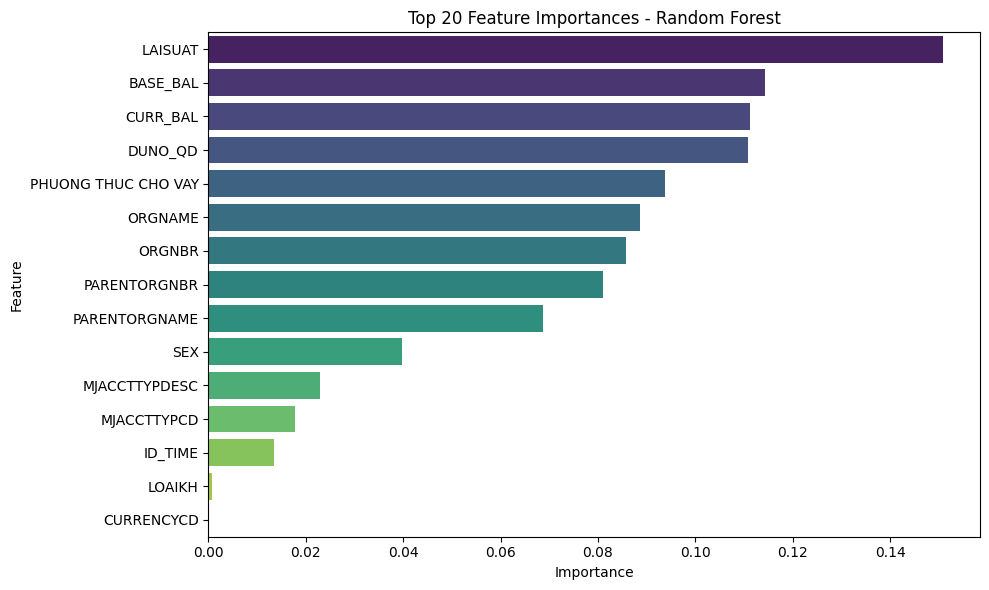

In [ ]:
# 10. Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# In top 20 features
print(" Top 20 Important Features:")
print(feature_importance_df.head(20))

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()


CATBOOST

In [ ]:
pip install catboost


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 1. Load dataset
df = pd.read_excel("Data_For Midterm and Final Project.xlsx", sheet_name="saoke_td_ct")

# 2. Filter only NHOMNO ∈ [1,2,3,4,5]
df_clean = df.dropna(subset=['NHOMNO', 'NHOMNO_TCBS', 'NHOMNOMOI', 'OPEN_DATE', 'MUCDICHVAY', 'DESC_TIME' , 'NGAYDENHAN'])
df_clean = df_clean[df_clean['NHOMNO'].isin([1, 2, 3, 4, 5])]

# 3. Encode object columns
df_object = df_clean.select_dtypes(include=['object']).astype(str)
df_encoded = df_object.apply(LabelEncoder().fit_transform)
df_numeric = df_clean.select_dtypes(include=['number'])
df_model = pd.concat([df_numeric, df_encoded], axis=1)

# 4. Feature & Label
X = df_model.drop(columns=['NHOMNO', 'NHOMNO_TCBS', 'NHOMNOMOI', 'OPEN_DATE', 'MUCDICHVAY', 'DESC_TIME' , 'NGAYDENHAN'])
y = df_model['NHOMNO']

# 5. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6. Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 7. Train CatBoost
catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='MultiClass',
    verbose=100,
    random_seed=42
)
catboost_model.fit(X_train_resampled, y_train_resampled)

# 8. Predict
y_pred = catboost_model.predict(X_test)
y_pred = y_pred.flatten()  # catboost trả về dạng 2D, cần flatten

# 9. Evaluation
print(" Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

print("\n Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=[1,2,3,4,5], columns=[1,2,3,4,5])
print(cm_df)




0:	learn: 1.5783507	total: 445ms	remaining: 7m 24s
100:	learn: 1.1223830	total: 27.4s	remaining: 4m 3s
200:	learn: 1.0181243	total: 54.1s	remaining: 3m 35s
300:	learn: 0.9463633	total: 1m 22s	remaining: 3m 10s
400:	learn: 0.8922169	total: 1m 49s	remaining: 2m 43s
500:	learn: 0.8481126	total: 2m 16s	remaining: 2m 15s
600:	learn: 0.8114589	total: 2m 43s	remaining: 1m 48s
700:	learn: 0.7792035	total: 3m 11s	remaining: 1m 21s
800:	learn: 0.7513917	total: 3m 38s	remaining: 54.4s
900:	learn: 0.7247968	total: 4m 5s	remaining: 27s
999:	learn: 0.7009354	total: 4m 33s	remaining: 0us
 Classification Report:

              precision    recall  f1-score   support

           1     0.9484    0.9355    0.9419     16241
           2     0.1253    0.1408    0.1326       639
           3     0.0682    0.0909    0.0779       231
           4     0.1026    0.1681    0.1275       232
           5     0.7944    0.7025    0.7456       726

    accuracy                         0.8774     18069
   macro avg   

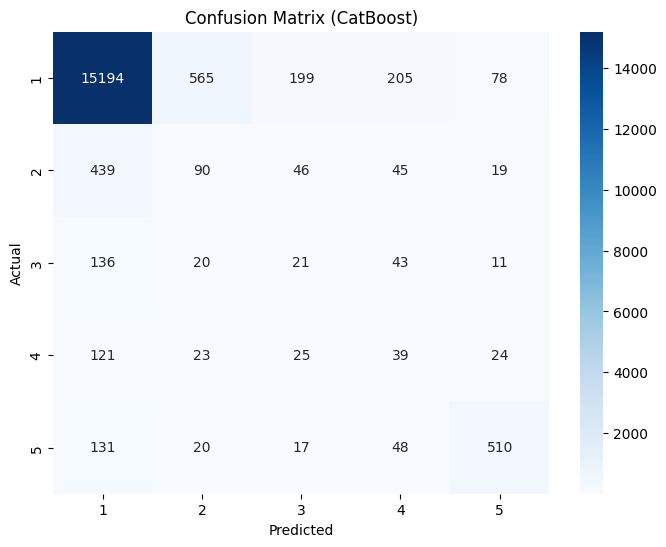


Top 15 Important Features:
                Feature  Importance
7               LAISUAT   16.960720
9   PHUONG THUC CHO VAY   15.153570
6          PARENTORGNBR   11.033641
14        PARENTORGNAME    9.570828
1              BASE_BAL    9.293250
5                ORGNBR    6.665186
13              ORGNAME    6.072674
2              CURR_BAL    6.025711
10                  SEX    4.950195
12        MJACCTTYPDESC    4.298125
3               DUNO_QD    4.253554
8           MJACCTTYPCD    3.177844
4               ID_TIME    2.536352
0                LOAIKH    0.008349
11           CURRENCYCD    0.000000


/tmp/ipython-input-58-975040691.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')


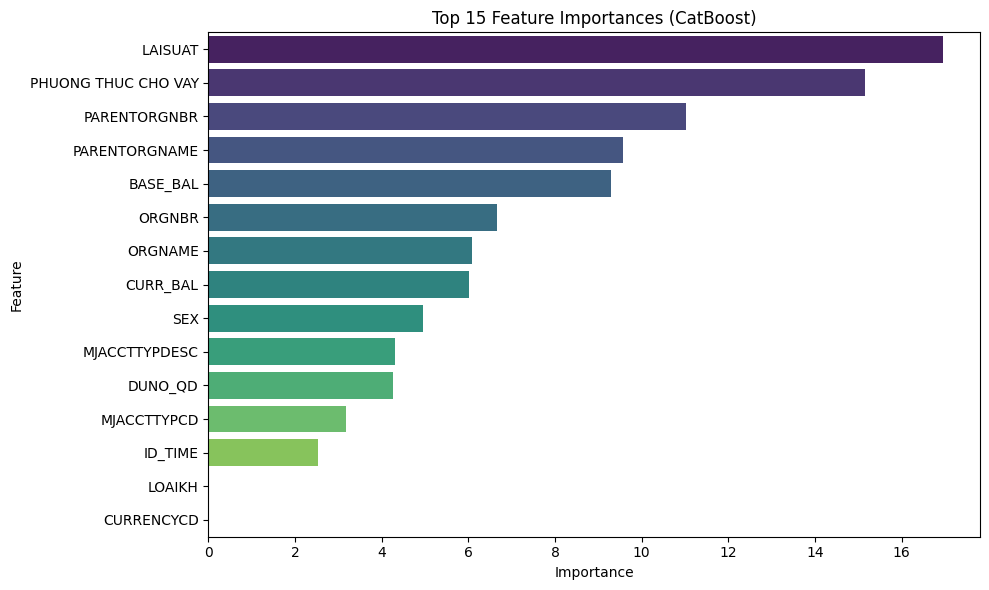

In [ ]:
# 10. Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (CatBoost)')
plt.show()

# 11. Feature Importance
importances = catboost_model.get_feature_importance()
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop 15 Important Features:")
print(importance_df.head(15))

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Top 15 Feature Importances (CatBoost)")
plt.tight_layout()
plt.show()



2 INFERIOR MODEL

NEUTRAL NETWORK

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# 1. Bỏ các dòng không có nhãn
df = df.dropna(subset=["NHOMNO"])
y = df["NHOMNO"].astype(int)

# 2. Xử lý X ban đầu
drop_cols = ['target', 'NHOMNO', 'NHOMNO_TCBS', 'NHOMNOMOI', 'OPEN_DATE', 'MUCDICHVAY', 'DESC_TIME', 'MGAYDENHAN']
X_raw = df.drop(columns=drop_cols, errors='ignore')

# 3. One-hot các biến object ít unique
low_card_cols = [col for col in X_raw.select_dtypes('object').columns if X_raw[col].nunique() < 20]
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X_raw[low_card_cols])
X_encoded = pd.DataFrame(X_encoded)

# 4. Ghép lại với biến số
X_numeric = X_raw.drop(columns=low_card_cols)
X_all = pd.concat([X_numeric.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)
X_all.columns = X_all.columns.astype(str)
X_all = X_all.select_dtypes(include=[np.number])  # Chỉ giữ numeric

# 5. Encode y: 1–5 → 0–4
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 6. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X_all, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# 7. SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 8. SelectKBest (n_features nhỏ hơn 200, đặt k='all' để tránh warning)
selector = SelectKBest(score_func=f_classif, k='all')
X_train_sel = selector.fit_transform(X_train_res, y_train_res)
X_test_sel = selector.transform(X_test)

# 9. Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)

# 10. Build model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 11. Train
history = model.fit(X_train_scaled, y_train_res, epochs=30, batch_size=64, validation_split=0.2, verbose=1)

# 12. Predict & evaluate
y_pred = model.predict(X_test_scaled).argmax(axis=1)
print(classification_report(y_test, y_pred))



Epoch 1/30
4061/4061 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.3506 - loss: 1.3698 - val_accuracy: 0.2441 - val_loss: 3.4162
Epoch 2/30
4061/4061 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.4456 - loss: 1.2082 - val_accuracy: 0.2331 - val_loss: 4.3295
Epoch 3/30
4061/4061 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.4642 - loss: 1.1715 - val_accuracy: 0.2481 - val_loss: 4.8172
Epoch 4/30
4061/4061 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.4780 - loss: 1.1498 - val_accuracy: 0.2348 - val_loss: 4.9997
Epoch 5/30
4061/4061 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.4814 - loss: 1.1408 - val_accuracy: 0.2272 - val_loss: 5.3805
Epoch 6/30
4061/4061 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.4851 - loss: 1.1329 - val_accuracy: 0.2338 - val_loss: 5.0557
Epoch 7/30
4061/4061 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.4875 - loss: 1.1263 - val_accuracy: 0.2397 - val_loss: 5.2703
Epoch 8/30
4061/4061 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.4909 - loss: 1

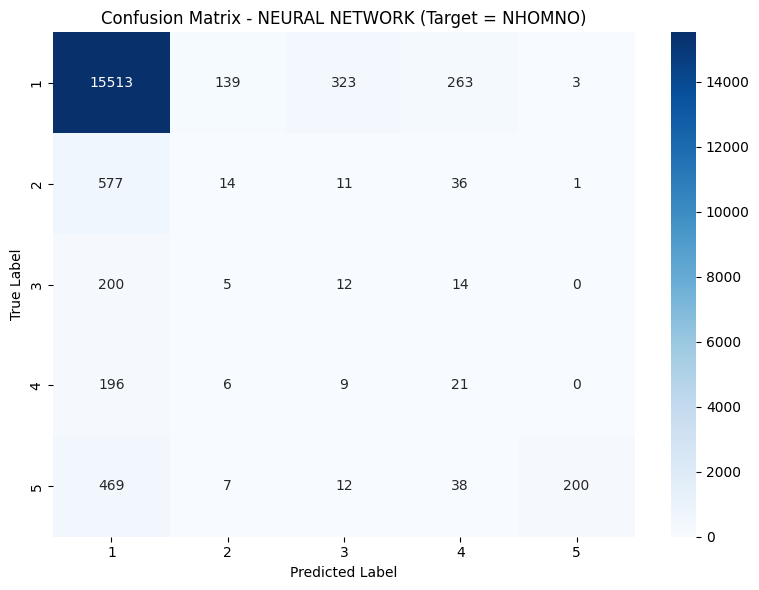

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - NEURAL NETWORK (Target = NHOMNO)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


Logistic Regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           1     0.9365    0.4849    0.6390     16241
           2     0.0505    0.2770    0.0854       639
           3     0.0134    0.0476    0.0209       231
           4     0.0189    0.1638    0.0339       232
           5     0.1125    0.5152    0.1846       726

    accuracy                         0.4691     18069
   macro avg     0.2264    0.2977    0.1928     18069
weighted avg     0.8485    0.4691    0.5855     18069

Accuracy: 0.4690907078421606
F1 Macro: 0.1927822661504892


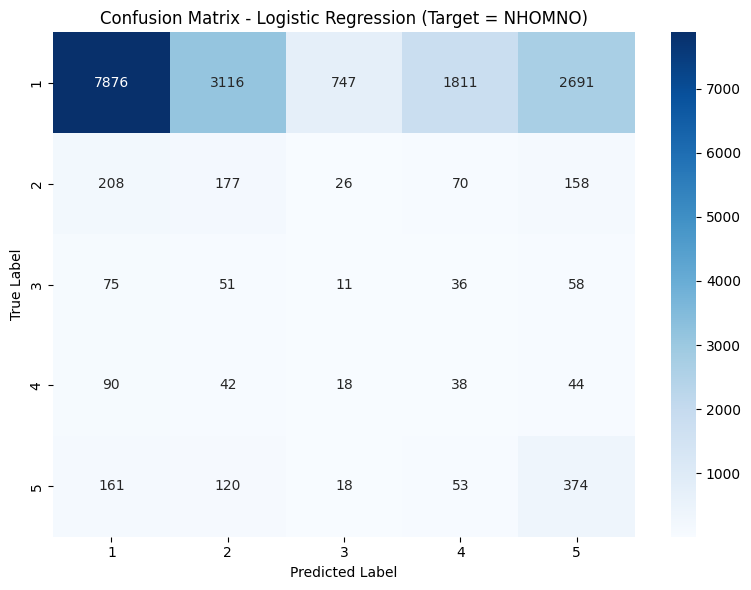

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# 1. Xử lý dữ liệu
df = df.dropna(subset=["NHOMNO"])
y = df["NHOMNO"].astype(int)

drop_cols = ['target', 'NHOMNO', 'NHOMNO_TCBS', 'NHOMNOMOI', 'OPEN_DATE',
             'MUCDICHVAY', 'DESC_TIME', 'MGAYDENHAN']
X = df.drop(columns=drop_cols, errors='ignore')

# Loại datetime nếu còn
X = X.drop(columns=X.select_dtypes(include=['datetime64']).columns)

# Encode object columns
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Chuẩn hóa dữ liệu số
numeric_cols = ['BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'LAISUAT', 'ID_TIME']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Encode target NHOMNO 1–5 → 0–4
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 2. Tách tập train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# 3. Áp dụng SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# 4. Huấn luyện Logistic Regression
log_model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
log_model.fit(X_train_sm, y_train_sm)

# 5. Dự đoán
y_pred = log_model.predict(X_test)

# 6. Decode lại nhãn 0–4 → 1–5
y_test_decoded = le.inverse_transform(y_test)
y_pred_decoded = le.inverse_transform(y_pred)

# 7. Đánh giá mô hình
print("Classification Report:")
print(classification_report(y_test_decoded, y_pred_decoded, digits=4))
print("Accuracy:", accuracy_score(y_test_decoded, y_pred_decoded))
print("F1 Macro:", f1_score(y_test_decoded, y_pred_decoded, average='macro'))

# 8. Confusion Matrix
cm = confusion_matrix(y_test_decoded, y_pred_decoded)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Logistic Regression (Target = NHOMNO)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


CHỌN XGBOOST, CATBOOST, RANDOM FOREST ĐỂ TRAIN KỸ

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Kiểm tra lại phân phối nhãn sau SMOTE
print(pd.Series(y_resampled).value_counts().sort_index())
print('Các lớp sau SMOTE:', np.unique(y_resampled))

NHOMNO
1    81202
2    81202
3    81202
4    81202
5    81202
Name: count, dtype: int64
Các lớp sau SMOTE: [1 2 3 4 5]


/tmp/ipython-input-63-1270848632.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, ax=axes[1], palette="Set1")


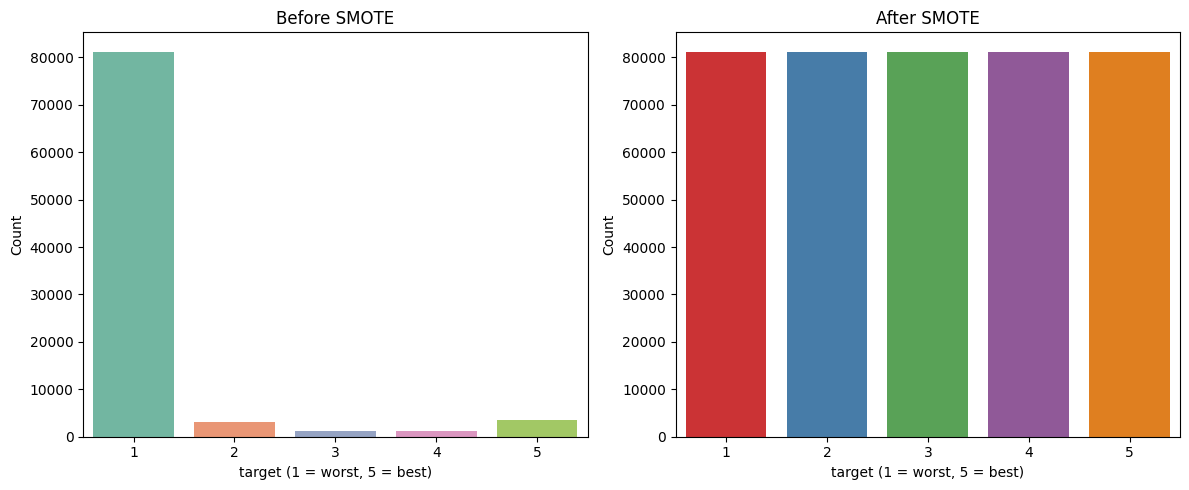

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=y, ax=axes[0], palette="Set2")
axes[0].set_title('Before SMOTE')
axes[0].set_xlabel('target (1 = worst, 5 = best)')
axes[0].set_ylabel('Count')

sns.countplot(x=y_resampled, ax=axes[1], palette="Set1")
axes[1].set_title('After SMOTE')
axes[1].set_xlabel('target (1 = worst, 5 = best)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

11. PREDICT VALIDATION

 Classification Report:

              precision    recall  f1-score   support

           1     0.9421    0.9619    0.9519     16241
           2     0.1375    0.1205    0.1284       639
           3     0.0786    0.0476    0.0593       231
           4     0.1667    0.1034    0.1277       232
           5     0.8037    0.7107    0.7544       726

    accuracy                         0.8994     18069
   macro avg     0.4257    0.3889    0.4043     18069
weighted avg     0.8871    0.8994    0.8929     18069


 Confusion Matrix:
       1    2   3   4    5
1  15623  413  82  65   58
2    501   77  25  15   21
3    153   29  11  23   15
4    142   23  11  24   32
5    164   18  11  17  516


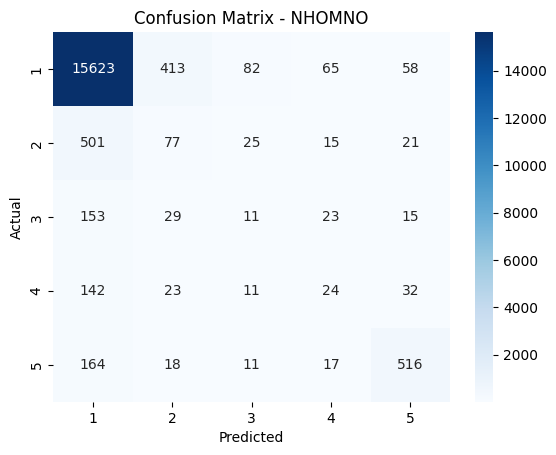

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 1. Load dataset
df = pd.read_excel("Data_For Midterm and Final Project.xlsx", sheet_name="saoke_td_ct")

# 2. Filter only NHOMNO ∈ [1,2,3,4,5]
df_clean = df.dropna(subset=['NHOMNO', 'NHOMNO_TCBS', 'NHOMNOMOI', 'OPEN_DATE', 'MUCDICHVAY', 'DESC_TIME' , 'NGAYDENHAN'])
df_clean = df_clean[df_clean['NHOMNO'].isin([1, 2, 3, 4, 5])]

# 3. Encode object columns
df_object = df_clean.select_dtypes(include=['object']).astype(str)
df_encoded = df_object.apply(LabelEncoder().fit_transform)
df_numeric = df_clean.select_dtypes(include=['number'])
df_model = pd.concat([df_numeric, df_encoded], axis=1)

# 4. Feature & Label
X = df_model.drop(columns=['NHOMNO', 'NHOMNO_TCBS', 'NHOMNOMOI', 'OPEN_DATE', 'MUCDICHVAY', 'DESC_TIME' , 'NGAYDENHAN'])
y = df_model['NHOMNO']

# 5. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6. Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 7. Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# 8. Predict
y_pred = rf.predict(X_test)

# 9. Evaluation
print(" Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

print("\n Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=[1,2,3,4,5], columns=[1,2,3,4,5])
print(cm_df)

# Optional: Vẽ heatmap confusion matrix
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - NHOMNO")
plt.show()

 Top 20 Important Features:
                Feature  Importance
7               LAISUAT    0.150938
1              BASE_BAL    0.114402
2              CURR_BAL    0.111151
3               DUNO_QD    0.110911
9   PHUONG THUC CHO VAY    0.093819
13              ORGNAME    0.088746
5                ORGNBR    0.085720
6          PARENTORGNBR    0.081062
14        PARENTORGNAME    0.068799
10                  SEX    0.039665
12        MJACCTTYPDESC    0.022820
8           MJACCTTYPCD    0.017783
4               ID_TIME    0.013426
0                LOAIKH    0.000751
11           CURRENCYCD    0.000008


/tmp/ipython-input-65-670055114.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(20), x='Importance', y='Feature', palette='viridis')


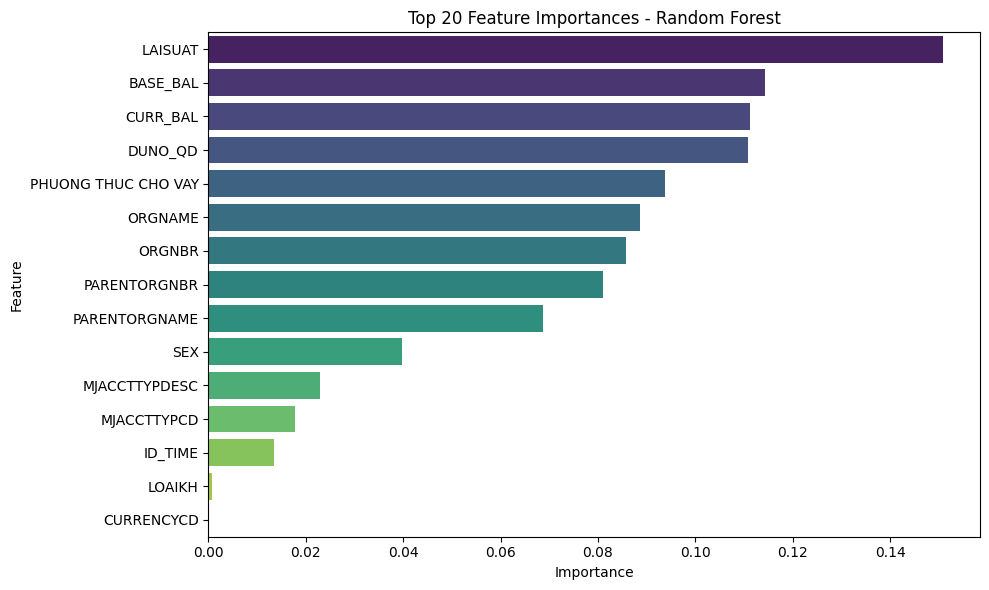

In [ ]:
# 10. Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# In top 20 features
print(" Top 20 Important Features:")
print(feature_importance_df.head(20))

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Load dữ liệu TRAIN
df_train = pd.read_excel("Data_For Midterm and Final Project.xlsx", sheet_name="saoke_td_ct")

# 2. Làm sạch dữ liệu TRAIN
df_train = df_train.dropna(subset=['NHOMNO', 'NHOMNO_TCBS', 'NHOMNOMOI', 'OPEN_DATE', 'MUCDICHVAY', 'DESC_TIME' , 'NGAYDENHAN'])
df_train = df_train[df_train['NHOMNO'].isin([1, 2, 3, 4, 5])]

# 3. Encode cột object
df_train_object = df_train.select_dtypes(include=['object']).astype(str)
label_encoders = {col: LabelEncoder().fit(df_train_object[col]) for col in df_train_object.columns}
df_train_encoded = df_train_object.apply(lambda col: label_encoders[col.name].transform(col))
df_train_numeric = df_train.select_dtypes(include=['number'])
df_model = pd.concat([df_train_numeric, df_train_encoded], axis=1)

# 4. Chuẩn bị dữ liệu huấn luyện
X = df_model.drop(columns=['NHOMNO', 'NHOMNO_TCBS', 'NHOMNOMOI', 'OPEN_DATE', 'MUCDICHVAY', 'DESC_TIME', 'NGAYDENHAN'])
y = df_model['NHOMNO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


#  SMOTE: Cân bằng tập train
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 5. Huấn luyện mô hình
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# ------------------------------------
# 6. Load dữ liệu VALIDATION
df_val = pd.read_excel("Data-Validation.xlsx")

# 7. Làm sạch dữ liệu validation
df_val_clean = df_val.dropna(subset=['OPEN_DATE', 'MUCDICHVAY', 'DESC_TIME', 'NGAYDENHAN'])

# 8. Encode object columns trong validation
df_val_object = df_val_clean.select_dtypes(include=['object']).astype(str)
df_val_encoded = pd.DataFrame()

for col in df_val_object.columns:
    if col in label_encoders:
        le = label_encoders[col]
        df_val_encoded[col] = df_val_object[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    else:
        df_val_encoded[col] = df_val_object[col]

# 9. Kết hợp lại dữ liệu
df_val_numeric = df_val_clean.select_dtypes(include=['number'])
df_val_model = pd.concat([df_val_numeric, df_val_encoded], axis=1)

# 10. Đảm bảo cột đúng thứ tự với dữ liệu train
X_val = df_val_model[X.columns]

# 11. Dự báo
y_val_pred = rf.predict(X_val)
df_val_clean['NHOMNO_PREDICTED'] = y_val_pred

# 12. Xuất kết quả + TẢI FILE
output_path = "Predicted_NHOMNO_Validation.xlsx"
df_val_clean.to_excel(output_path, index=False)

# Nếu đang chạy trong Jupyter/Notebook:
from IPython.display import FileLink
print(" Dự báo hoàn tất!")
display(FileLink(output_path))

 Dự báo hoàn tất!


/content/Predicted_NHOMNO_Validation.xlsx